In [5]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms.functional import to_tensor
import torch

In [7]:
def decode_binary_labels(labels, nclass):
    bits = torch.pow(2, torch.arange(nclass))
    return (labels & bits.view(-1, 1, 1)) > 0
ARGOVERSE_CLASS_NAMES = [
    'drivable_area', 'vehicle', 'pedestrian', 'large_vehicle', 'bicycle', 'bus',
    'trailer', 'motorcycle',
]
num_class = len(ARGOVERSE_CLASS_NAMES)


In [9]:
label_path = 'data/argo/labels/train/043aeba7-14e5-3cde-8a5c-639389b6d3a6/ring_front_center/ring_front_center_315967467034868064.png'
encoded_labels = to_tensor(Image.open(label_path)).long()


/home/tomb/anaconda3/lib/python3.8/site-packages/torchvision/transforms/functional.py:88: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.int32, copy=False))


In [10]:

labels = decode_binary_labels(encoded_labels, num_class+ 1)
labels, mask = labels[:-1], ~labels[-1]


In [11]:
x = mask.numpy()

In [12]:
y = labels.numpy()

In [13]:
x.shape

(196, 200)

In [14]:
y.shape

(8, 196, 200)

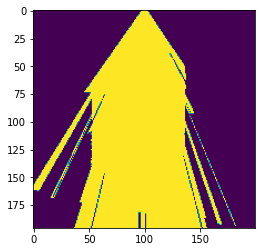

In [15]:
plt.imshow(x)

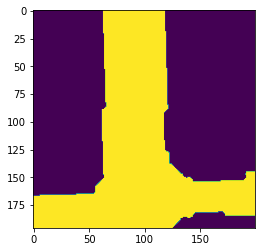

In [16]:
plt.imshow(y[0, :, :])

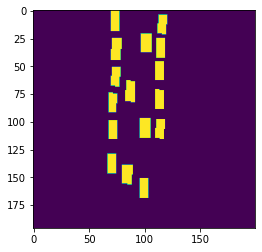

In [17]:
plt.imshow(y[1, :, :]) #vehicle

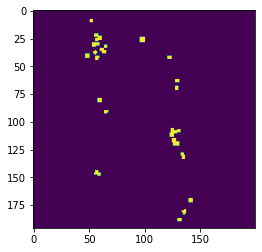

In [18]:
plt.imshow(y[2, :, :]) #pedestrian

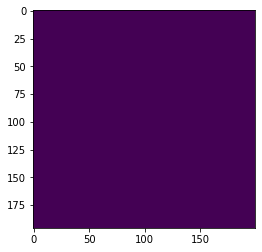

In [19]:
plt.imshow(y[3, :, :]) # large vehicle

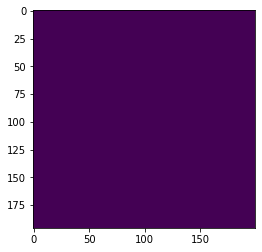

In [20]:
plt.imshow(y[4, :, :])#bicycle

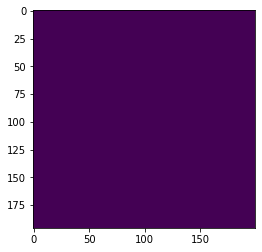

In [21]:
plt.imshow(y[5, :, :])#trailer

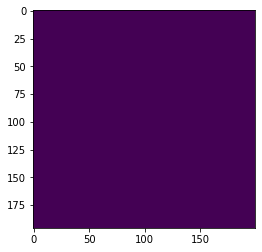

In [22]:
plt.imshow(y[6, :, :])#motorcycle

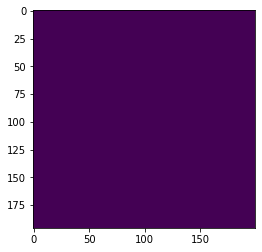

In [23]:
plt.imshow(y[7, :, :])#vehicle